<a href="https://colab.research.google.com/github/QuynhNhu0810/Healthcare-Appointment-Data/blob/main/Healthcare_Medical_Appointment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load libraries
from io import IncrementalNewlineDecoder
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
#Load data
health_data = pd.read_csv('/Data-Healthcare.csv')

# **DATA PREPARATION**

In [ ]:
# Print the top 10 rows
df = health_data
df.head(10)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [ ]:
health_data.shape

(110527, 14)

In [ ]:
#Basic info
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
# dropping some columns which have no significance
health_data.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

In [ ]:
#transform date-time format
health_data['ScheduledDay'] = pd.to_datetime(health_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
health_data['AppointmentDay'] = pd.to_datetime(health_data['AppointmentDay']).dt.date.astype('datetime64[ns]')


In [ ]:
df.head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No
5,F,2016-04-27,2016-04-29,76,0,1,0,0,0,0,No
6,F,2016-04-27,2016-04-29,23,0,0,0,0,0,0,Yes
7,F,2016-04-27,2016-04-29,39,0,0,0,0,0,0,Yes
8,F,2016-04-29,2016-04-29,21,0,0,0,0,0,0,No
9,F,2016-04-27,2016-04-29,19,0,0,0,0,0,0,No


In [ ]:
# find out the weekdays of schedule day and appointment day. With Monday = 0 and Sunday = 6
health_data['sch_weekday'] = health_data['ScheduledDay'].dt.dayofweek
health_data['app_weekday'] = health_data['AppointmentDay'].dt.dayofweek
health_data['sch_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sch_weekday, dtype: int64

In [ ]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int64         
 12  app_weekday     110527 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.0+ MB


**NO MISSING VALUES**

In [ ]:
#Check columns
health_data.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show', 'sch_weekday', 'app_weekday'],
      dtype='object')

In [ ]:
#changing the name of some columns
health_data= health_data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

# **DATA EXPLORATORY**

<ipython-input-32-4b07ae4737c6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=health_data, x='sch_weekday', order=health_data['sch_weekday'].value_counts().index, palette='pastel')


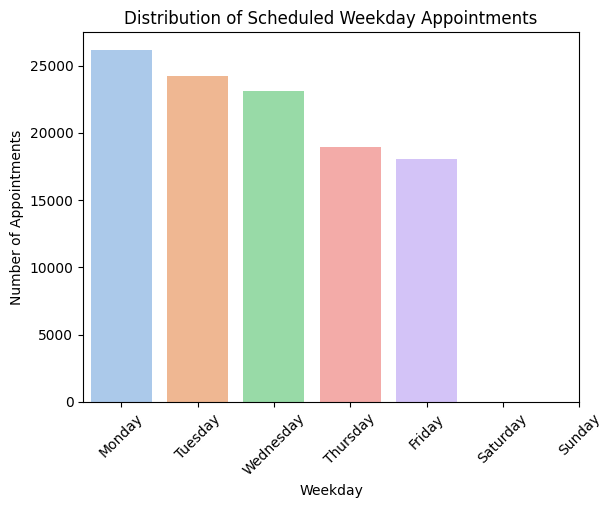

In [ ]:
# Define the days of the week
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the distribution of scheduled weekday appointments
sns.countplot(data=health_data, x='sch_weekday', order=health_data['sch_weekday'].value_counts().index, palette='pastel')
plt.title('Distribution of Scheduled Weekday Appointments')
plt.xlabel('Weekday')
plt.ylabel('Number of Appointments')
plt.xticks(range(7), weekday_names, rotation=45)
plt.show()

<ipython-input-40-a0351d91a218>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.app_weekday, order=df.app_weekday.value_counts().index, palette='pastel')


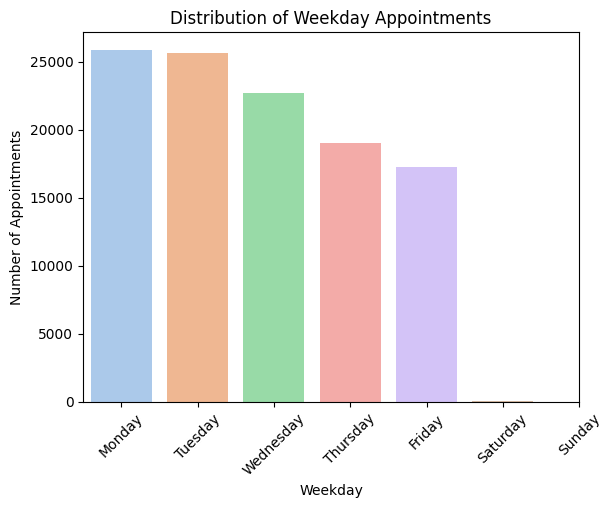

In [ ]:
# Plotting the distribution of weekday appointments
ax = sns.countplot(x=df.app_weekday, order=df.app_weekday.value_counts().index, palette='pastel')
ax.set_title("Distribution of Weekday Appointments")
plt.xlabel('Weekday')
plt.ylabel('Number of Appointments')
plt.xticks(range(7), weekday_names, rotation=45)
plt.show()
plt.show()

There is no appointments on **Sunday** and on **Saturday** appointments are very less in comparision to other week days.

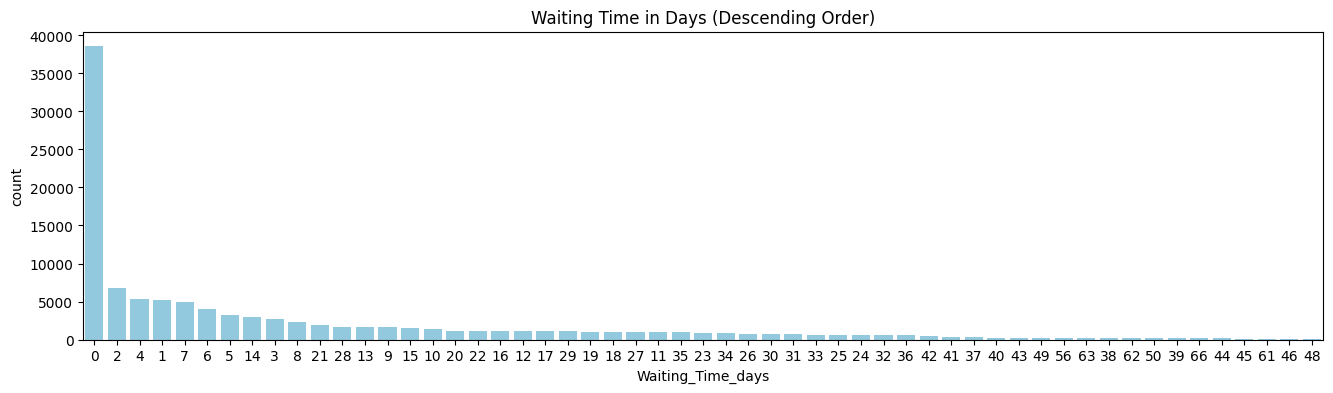

In [ ]:
# Get the Waiting Time in Days of the Patients.
df['Waiting_Time_days'] = df['AppointmentDay'] - df['ScheduledDay']
df['Waiting_Time_days'] = df['Waiting_Time_days'].dt.days
#Waiting time plot
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.Waiting_Time_days, order=df.Waiting_Time_days.value_counts().iloc[:55].index, color='skyblue')
ax.set_title("Waiting Time in Days (Descending Order)")
plt.show()

The majority of patients are scheduling their appointments for the same day, as indicated by a waiting time of 0 days. The next most common waiting times are 1 day, 2 days, and 4 days

In [ ]:
health_data.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


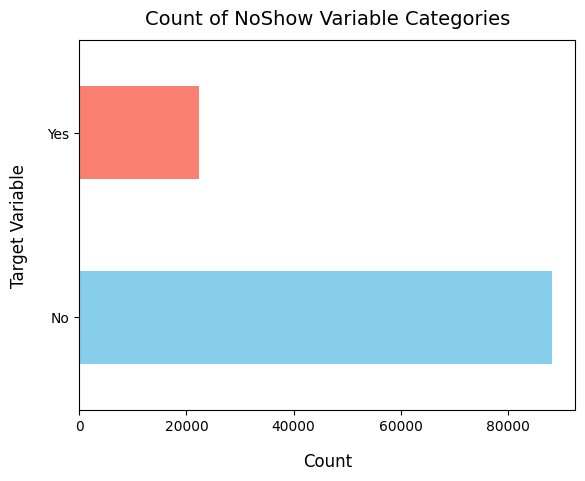

In [ ]:
health_data['NoShow'].value_counts().plot(kind='barh', color=['skyblue', 'salmon'])
plt.xlabel("Count", labelpad=14, fontsize=12)
plt.ylabel("Target Variable", labelpad=14, fontsize=12)
plt.title("Count of NoShow Variable Categories", fontsize=14, y=1.02)
plt.show()

In [ ]:
#Calculating the percentage of appointments that showed up and not show up
percentages = 100 * health_data['NoShow'].value_counts() / len(health_data['NoShow'])

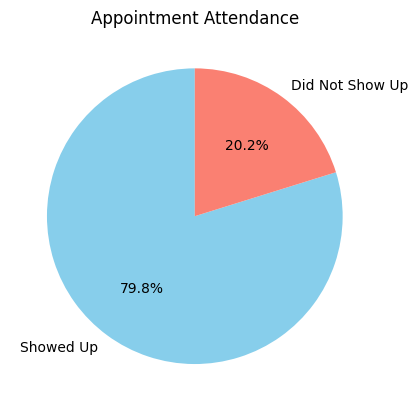

In [ ]:
#Plotting the pie chart
labels = ['Showed Up', 'Did Not Show Up']
colors = ['skyblue', 'salmon']
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Appointment Attendance')
plt.axis('off')
plt.show()

Approximately ***80%*** of patients attend their appointments, while around ***20%*** do not show up.

In [ ]:
# Divide customers into different age groups
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

health_data['Age_group'] = pd.cut(health_data.Age, range(1, 130, 20), right=False, labels=labels)

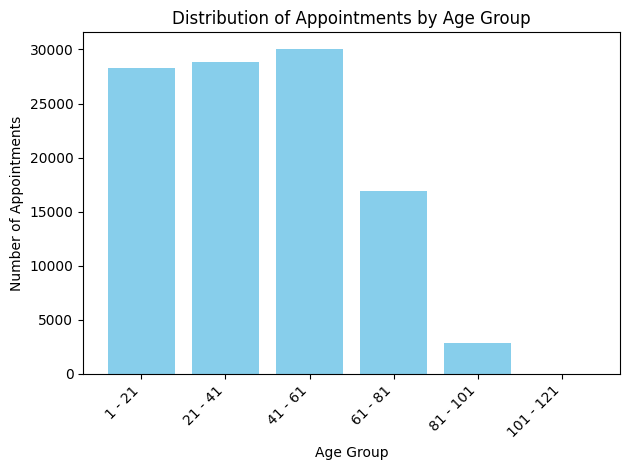

In [ ]:
age_group_counts = health_data['Age_group'].value_counts().sort_index()

# Plotting the histogram
plt.bar(age_group_counts.index, age_group_counts.values, color='skyblue')

# Adding labels and title
plt.xlabel("Age Group")
plt.ylabel("Number of Appointments")
plt.title("Distribution of Appointments by Age Group")

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The first three age groups (1-21, 21-41, 41-61) have the highest number of appointments.

---



Overall, the chart suggests that the majority of appointments are concentrated among younger individuals, with a sharp decline in appointments for those above 60 years of age.

In [ ]:
#Drop age column
health_data.drop(['Age'], axis=1, inplace=True)

In [ ]:
list(health_data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'sch_weekday',
 'app_weekday',
 'Age_group']

---------- Gender ----------
F    71840
M    38687
Name: Gender, dtype: int64
---------- ScheduledDay ----------
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: ScheduledDay, Length: 111, dtype: int64
---------- AppointmentDay ----------
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: AppointmentDay, dtype: int64
---------- Scholarship ----------
0    99666
1 

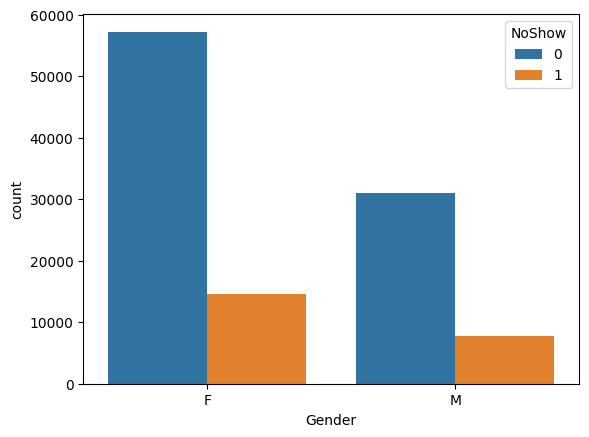

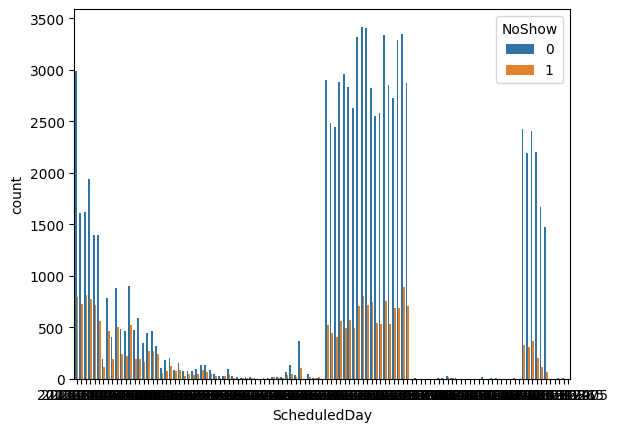

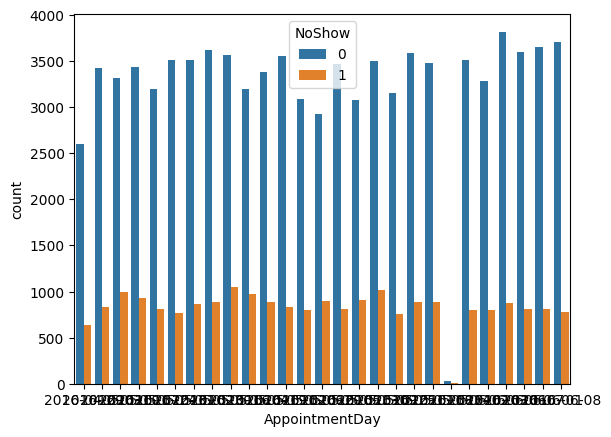

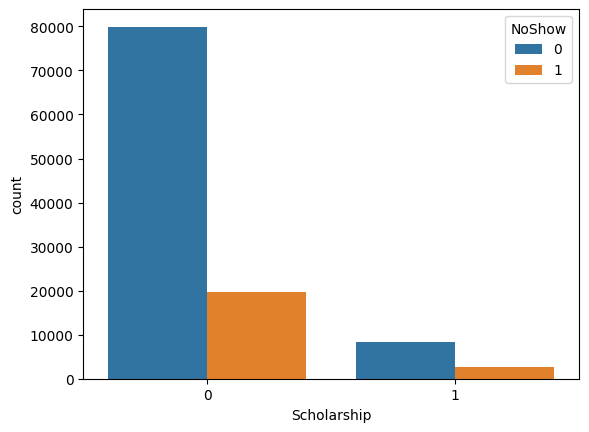

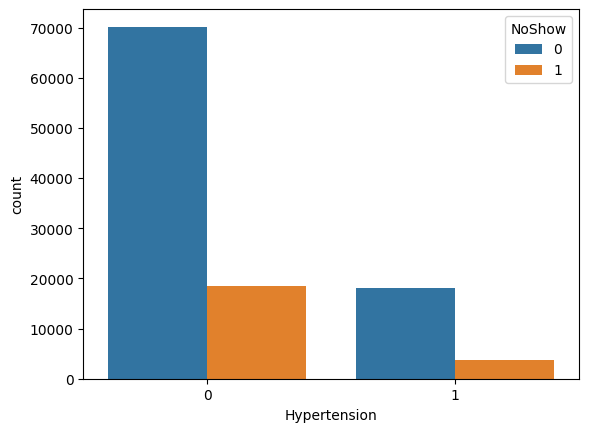

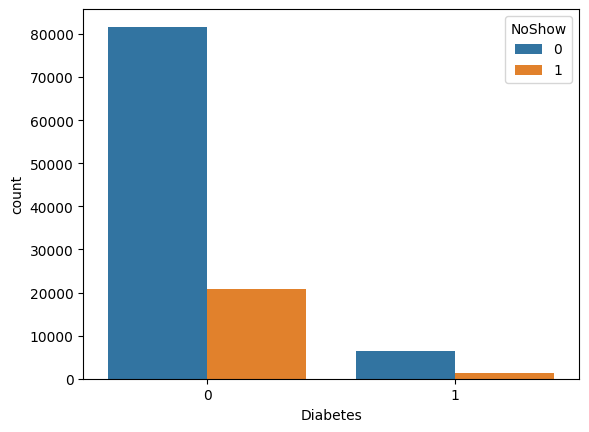

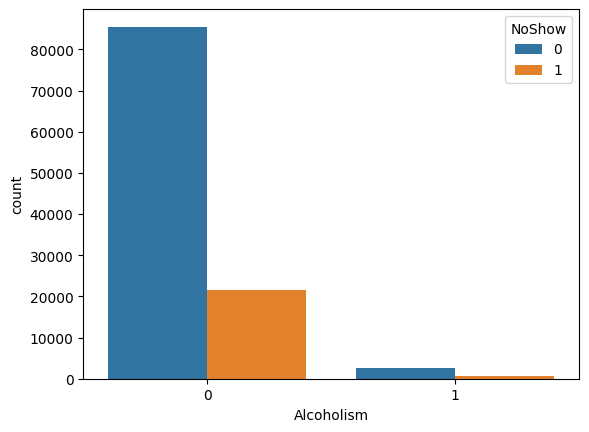

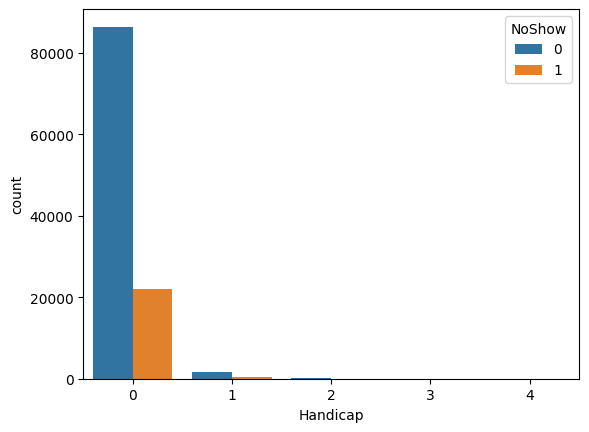

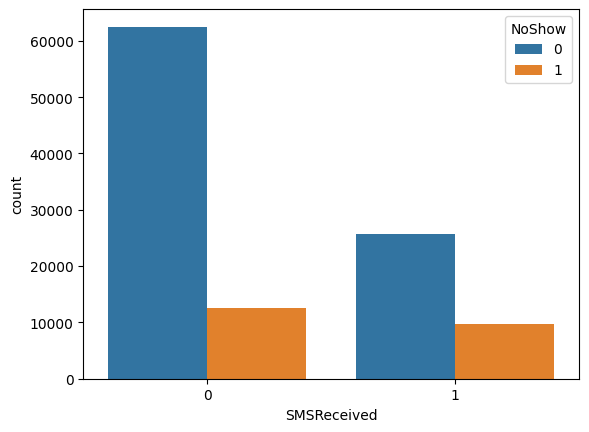

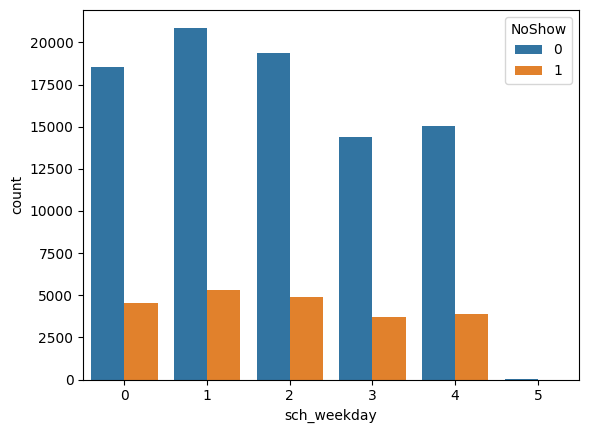

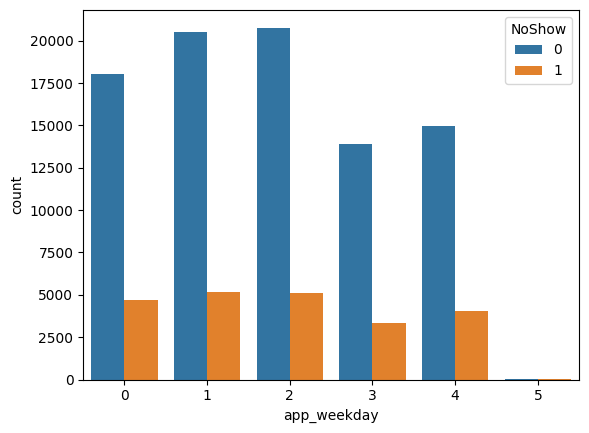

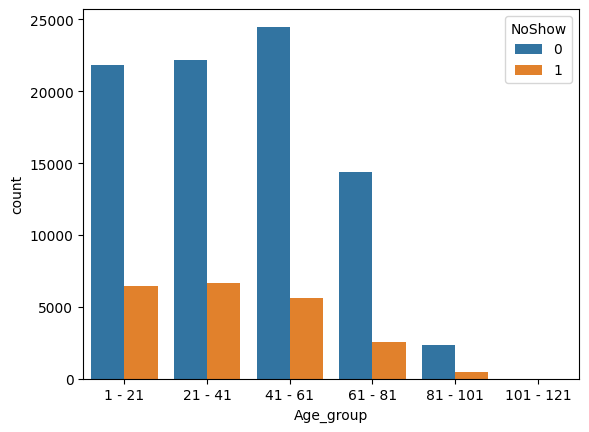

In [ ]:
for i, predictor in enumerate(health_data.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(health_data[predictor].value_counts())
    plt.figure(i)
    sns.countplot(data=health_data, x=predictor, hue='NoShow')

**Main findings**

* We observe that while 'Female' patients tend to book more appointments compared to 'Male' patients, the distribution of no-shows appears similar between genders. Hence, Gender may not significantly influence whether a patient attends their appointment.

* We find that out of approximately 100,000 patients without Scholarship, around 80% went to their appointments. In contrast, among the 10,500 patients with Scholarship, approximately 75% attended their appointments. Thus, the Scholarship feature may aid in predicting appointment attendance.

* Around 78% of the approximately 88,000 patients without Hypertension attended their appointments, while approximately 85% of 22,500 patients with Hypertension did so. This suggests that Hypertension status could play a role in predicting appointment attendance.

* In terms of SMS reminders, around 84% of the approximately 75,000 patients who did not receive SMS attended their appointments, while approximately 72% of the approximately 35,500 patients who did receive SMS did so. Interestingly, this contrasts with the common expectation that patients who receive SMS reminders are more likely to attend appointments. Further investigation is needed to understand this discrepancy.










In [ ]:
health_data['NoShow'] = np.where(health_data.NoShow == 'Yes',1,0)
health_data_dummies = pd.get_dummies(health_data)
health_data_dummies.head()


,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,0,1,0,0,1,0,0,0
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1,0,1,0,0,0,0,0
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,1,0,0,0,1,0,0,0


<ipython-input-51-7cd248817bfd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  health_data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar',color='salmon')


<Axes: >

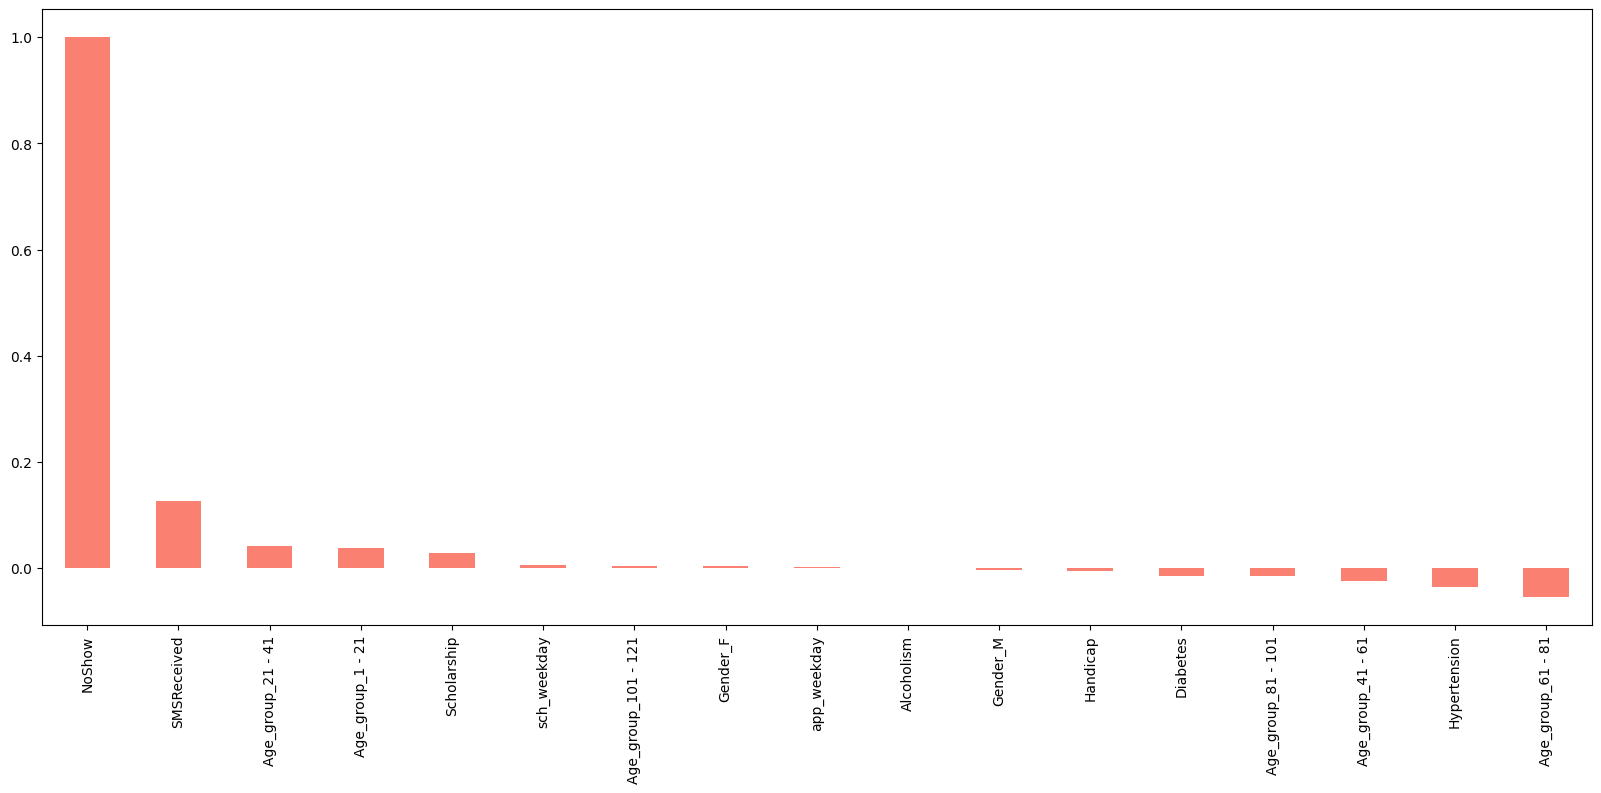

In [ ]:
#Build a correlation metrix
plt.figure(figsize=(20,8))
health_data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar',color='salmon')

Among the indicators studied, **receiving SMS reminders** and belonging to the **age group 21-41** exhibit the strongest correlation with appointment attendance.

<ipython-input-27-d1a440637b8c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(health_data_dummies.corr(), cmap="Paired")


<Axes: >

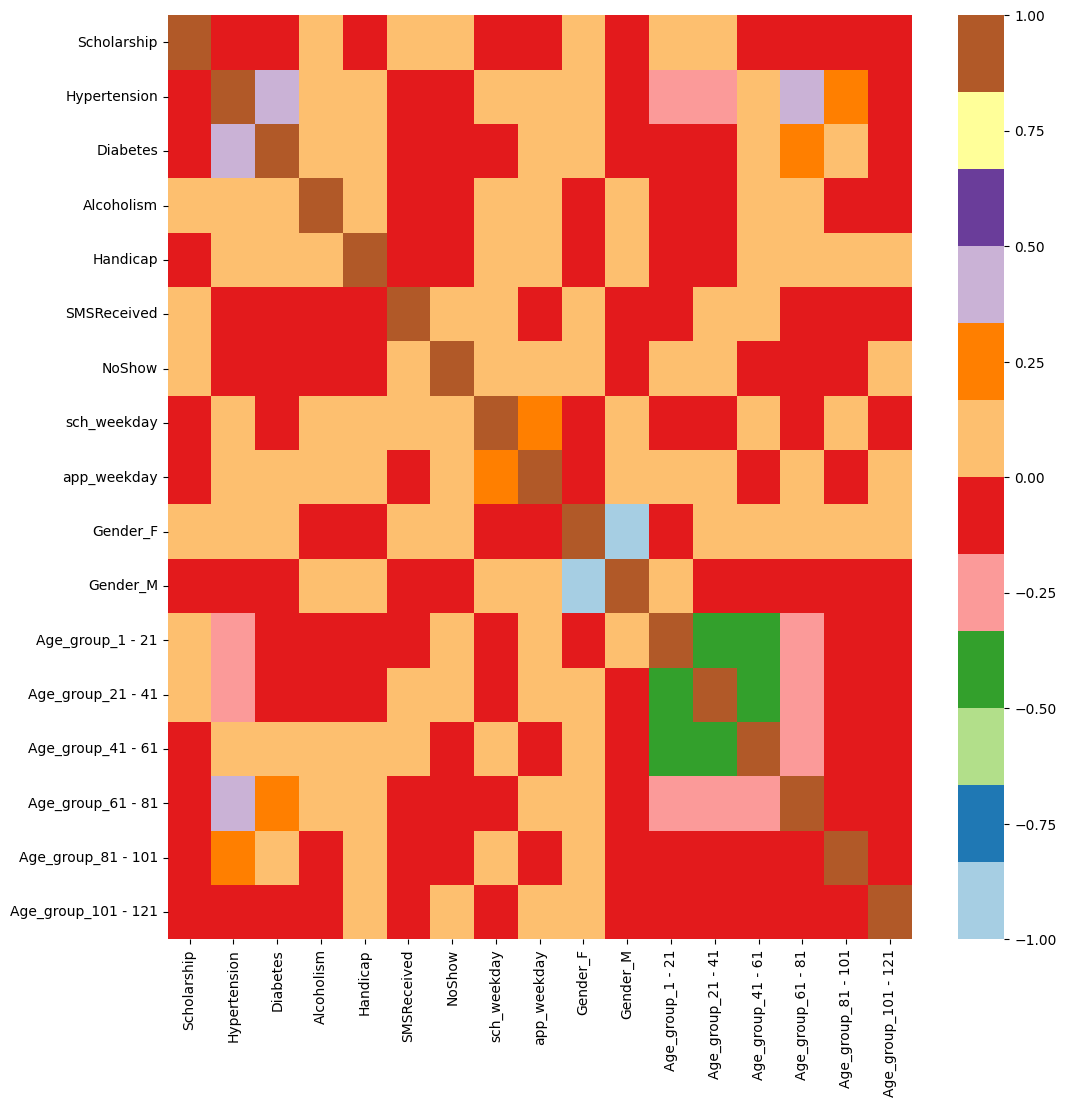

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(health_data_dummies.corr(), cmap="Paired")

Based on the above analysis, **Gender, AgeGroup, Scholarship, and Hypertension** emerge as key predictors for determining whether a patient will show up for their appointment

---

